In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as req
import pandas as pd
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
req.urlretrieve(url,'ame.txt')

('ame.txt', <http.client.HTTPMessage at 0x117c85320>)

In [3]:
df = pd.read_csv('ame.txt','\t',usecols=range(1,6))

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.columns.values

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'], dtype=object)

In [6]:
df_norm = (df - df.mean(axis=0))/df.std(axis=0)
df_norm = df_norm.drop('Species',axis=1)

In [7]:
pca = PCA(3)
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
feature = pca.transform(df_norm)

In [9]:
df_pca0, df_pca1, df_pca2 = feature[:50], feature[50:100], feature[100:]

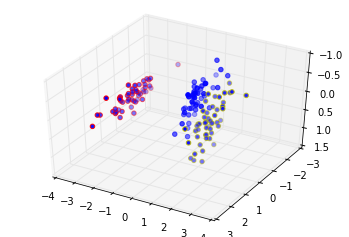

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='b')
ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='y')
ax.view_init(320,60)
plt.show()

In [11]:
df0, df1, df2 = df[df.Species == 0], df[df.Species == 1], df[df.Species == 2]

In [12]:
df0.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [14]:
df2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [15]:
df0_mean, df0_sd = df0.mean(axis=0), df0.std(axis=0)

In [16]:
df0_mean, df0_sd

(Sepal.Length    5.006
 Sepal.Width     3.428
 Petal.Length    1.462
 Petal.Width     0.246
 Species         0.000
 dtype: float64, Sepal.Length    0.352490
 Sepal.Width     0.379064
 Petal.Length    0.173664
 Petal.Width     0.105386
 Species         0.000000
 dtype: float64)

In [17]:
df1_mean, df1_sd = df1.mean(axis=0), df1.std(axis=0)
df2_mean, df2_sd = df2.mean(axis=0), df2.std(axis=0)

In [18]:
df0_mean, df1_mean, df2_mean

(Sepal.Length    5.006
 Sepal.Width     3.428
 Petal.Length    1.462
 Petal.Width     0.246
 Species         0.000
 dtype: float64, Sepal.Length    5.936
 Sepal.Width     2.770
 Petal.Length    4.260
 Petal.Width     1.326
 Species         1.000
 dtype: float64, Sepal.Length    6.588
 Sepal.Width     2.974
 Petal.Length    5.552
 Petal.Width     2.026
 Species         2.000
 dtype: float64)

In [19]:
df0_plot, df1_plot, df2_plot = df0.filter(items=['Sepal.Length','Sepal.Width','Petal.Length']),\
df1.filter(items=['Sepal.Length','Sepal.Width','Petal.Length']),df2.filter(items=['Sepal.Length','Sepal.Width','Petal.Length'])

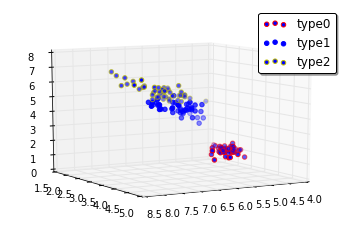

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='b', label='type1')
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='y', label='type2')
ax.view_init(10,60)
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

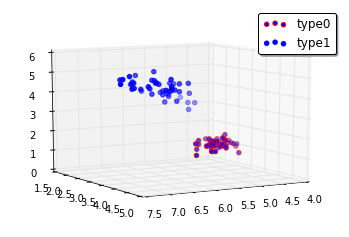

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='b', label='type1')
ax.view_init(10,60)
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

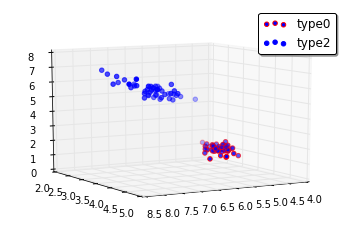

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.view_init(10,60)
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='b', label='type2')
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

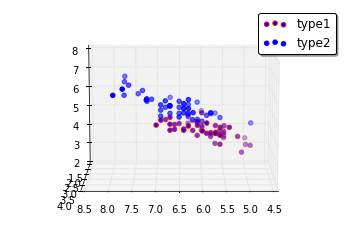

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='r', label='type1')
ax.view_init(10,90)
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='b', label='type2')
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

# 予測

In [24]:
df_use = shuffle(df)
df_use

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
67,5.8,2.7,4.1,1.0,1
25,5.0,3.0,1.6,0.2,0
5,5.4,3.9,1.7,0.4,0
40,5.0,3.5,1.3,0.3,0
22,4.6,3.6,1.0,0.2,0
123,6.3,2.7,4.9,1.8,2
136,6.3,3.4,5.6,2.4,2
114,5.8,2.8,5.1,2.4,2
128,6.4,2.8,5.6,2.1,2
18,5.7,3.8,1.7,0.3,0


In [25]:
X_train = df_use[:100]
X_val = df_use[100:]
Y_train, Y_val = X_train['Species'], X_val['Species']
X_train, X_val = X_train.drop('Species', axis=1), X_val.drop('Species', axis=1)

In [26]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
67,5.8,2.7,4.1,1.0
25,5.0,3.0,1.6,0.2
5,5.4,3.9,1.7,0.4
40,5.0,3.5,1.3,0.3
22,4.6,3.6,1.0,0.2


In [27]:
model = svm.SVC()

In [28]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
model.score(X_val, Y_val)

0.95999999999999996

In [30]:
Y_predict = model.predict(X_val)
print(Y_predict, Y_val.as_matrix())

[0 1 0 0 1 2 1 2 0 1 2 1 2 0 2 2 0 2 2 1 0 0 2 2 2 0 1 1 1 0 1 2 1 2 2 0 2
 2 1 2 1 0 1 0 2 1 1 1 2 2] [0 1 0 0 1 2 1 1 0 1 2 1 2 0 2 2 0 2 2 1 0 0 2 2 2 0 1 1 1 0 1 2 1 2 2 0 2
 2 1 2 1 0 1 0 2 1 1 1 1 2]


In [37]:
predicted = model.predict(df[50:51].drop('Species', axis=1))

In [38]:
predicted

array([1])

In [39]:
df[50:51]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,1
